In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [34]:
data_path = "C:\\Users\\User\\Downloads\\ml2proj\\CC GENERAL.csv"

df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [139]:

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [35]:
df_copy=df.copy()
df_copy.dropna(inplace=True)
df_copy.drop('CUST_ID', axis=1, inplace=True)

In [36]:
df_copy.shape

(8636, 17)

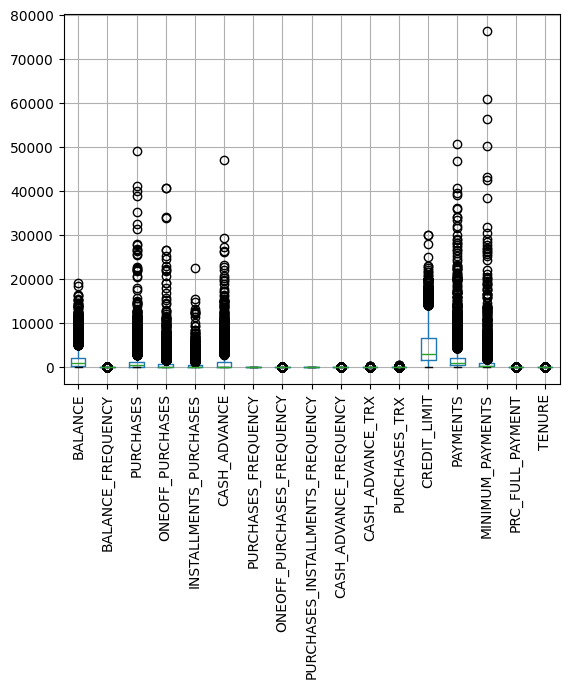

In [ ]:
df_copy.boxplot()
plt.xticks(rotation=90)  
plt.show()

In [38]:
for col in df_copy.columns:
    q1 = df_copy[col].quantile(0.05)
    q3 = df_copy[col].quantile(0.95)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]

In [39]:
df_copy.shape

(8219, 17)

In [40]:
skewness_scores = df_copy.skew()
skewness_scores

BALANCE                             2.207374
BALANCE_FREQUENCY                  -2.034980
PURCHASES                           2.385497
ONEOFF_PURCHASES                    2.866361
INSTALLMENTS_PURCHASES              2.679585
CASH_ADVANCE                        2.768727
PURCHASES_FREQUENCY                 0.062899
ONEOFF_PURCHASES_FREQUENCY          1.577002
PURCHASES_INSTALLMENTS_FREQUENCY    0.517930
CASH_ADVANCE_FREQUENCY              1.742105
CASH_ADVANCE_TRX                    2.654893
PURCHASES_TRX                       2.516963
CREDIT_LIMIT                        1.438382
PAYMENTS                            2.565915
MINIMUM_PAYMENTS                    2.869902
PRC_FULL_PAYMENT                    1.905744
TENURE                             -2.962638
dtype: float64

In [44]:
#If the skewness score is highly skewed (less than -1 or greater than 1), 
#a log transformation is often recommended to make the distribution more symmetric.

In [42]:
from sklearn import preprocessing
transformer = preprocessing.FunctionTransformer(np.log1p, validate=True)
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']
df_copy[cols] = transformer.transform(df_copy[cols])

Visualize data using tsne to evaluate preprocessing techniques

In [9]:
from sklearn.manifold import TSNE

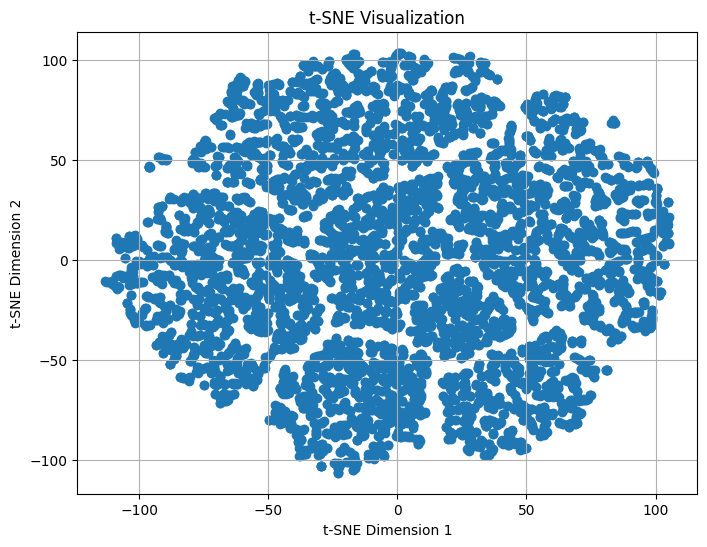

In [11]:
tsne = TSNE(n_components=2,perplexity=5.0 ,random_state=42)        
tsne_result = tsne.fit_transform(df_copy)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()  

KMeans

In [ ]:
from sklearn.metrics import silhouette_score

In [80]:
from sklearn.cluster import KMeans

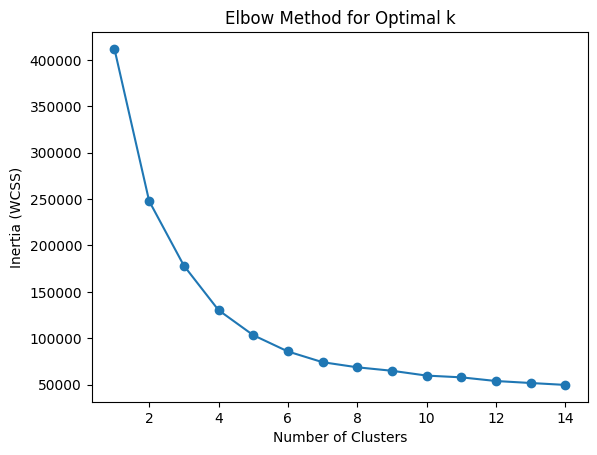

In [145]:
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_copy)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [150]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=1, random_state=None)
kmeans.fit(df_copy)

KMeans(n_clusters=7, n_init=1)

In [151]:
silhouette_score(df_copy, kmeans.fit_predict(df_copy))

0.48003302054444885

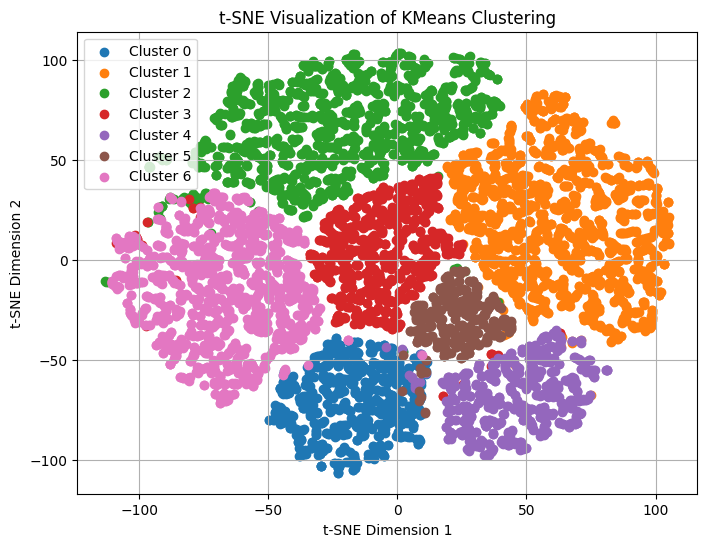

In [152]:
cluster_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1], label=f'Cluster {cluster}')

plt.legend()
plt.title('t-SNE Visualization of KMeans Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


Hierarchial clustering

In [153]:
import scipy.cluster.hierarchy as shc

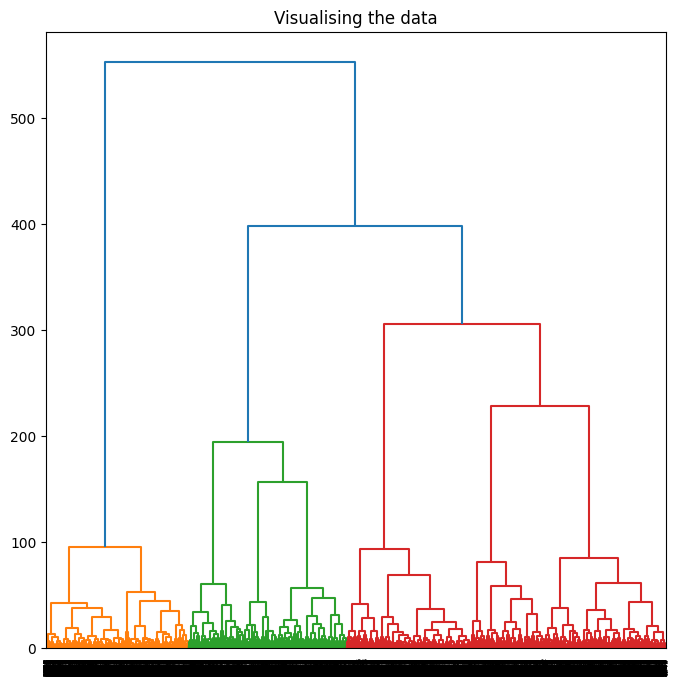

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df_copy,metric='euclidean', method ='ward')))

In [130]:
from sklearn.cluster import AgglomerativeClustering

In [154]:
hc = AgglomerativeClustering(n_clusters = 7,metric='euclidean', linkage ='ward')
hc.fit(df_copy)

AgglomerativeClustering(metric='euclidean', n_clusters=7)

In [155]:
silhouette_score(df_copy, hc.fit_predict(df_copy))

0.47623988050190325

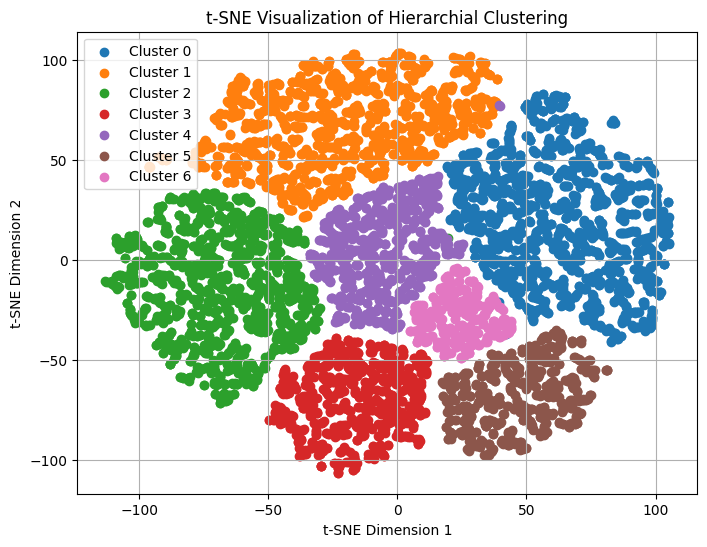

In [156]:
cluster_labels = hc.labels_

plt.figure(figsize=(8, 6))
for cluster in range(hc.n_clusters):
    plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1], label=f'Cluster {cluster}')

plt.legend()
plt.title('t-SNE Visualization of Hierarchial Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


DBSCAN

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

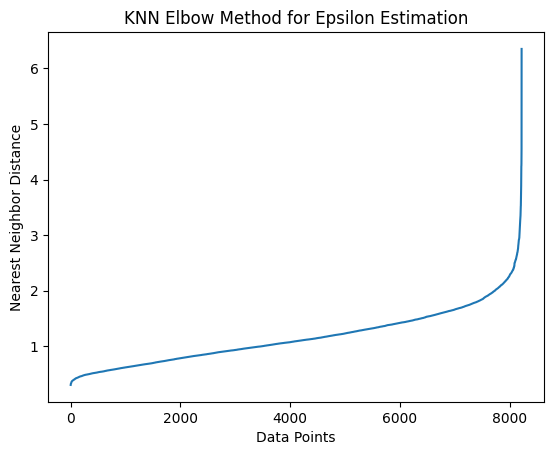

In [157]:
nbrs = NearestNeighbors(n_neighbors=6).fit(df_copy)
distances, _ = nbrs.kneighbors(df_copy)
distances = np.sort(distances[:, -1])

plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel(f'Nearest Neighbor Distance')
plt.title(f'KNN Elbow Method for Epsilon Estimation')
plt.show()

In [13]:
db = DBSCAN(eps=2.1, min_samples=5).fit(df_copy)

In [14]:
cluster_labels = db.labels_

In [15]:
silhouette_score(df_copy, db.fit_predict(df_copy))

0.47228837430718346

In [17]:
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
num_outliers = list(cluster_labels).count(-1)

print("Number of clusters:", num_clusters)
print("Number of outliers:", num_outliers)

Number of clusters: 7
Number of outliers: 111


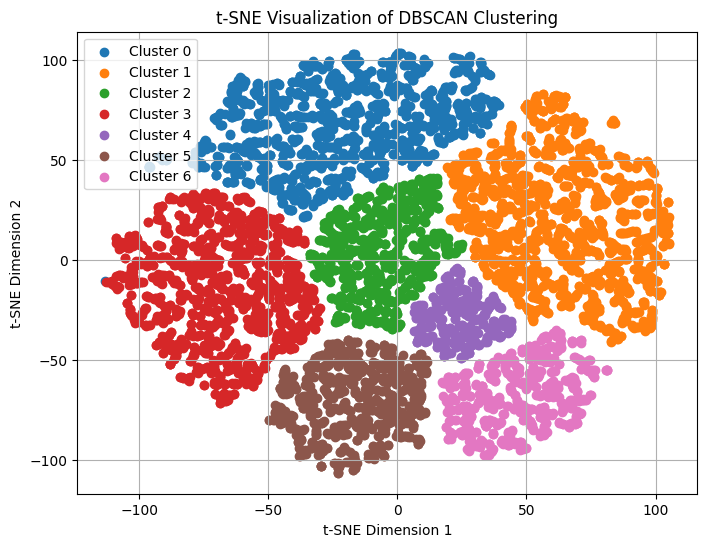

In [18]:
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1], label=f'Cluster {cluster}')

plt.legend()
plt.title('t-SNE Visualization of DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


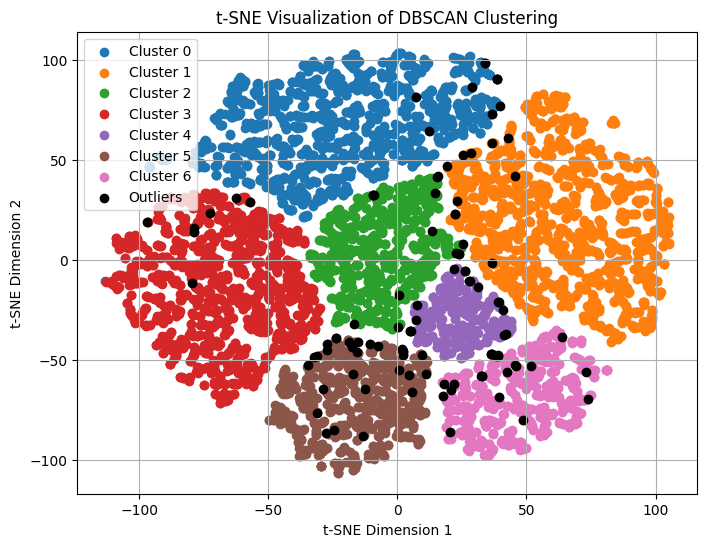

In [162]:
plt.figure(figsize=(8, 6))
for cluster in set(cluster_labels):
    if cluster == -1:  
        plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1], c='black', label='Outliers')
    else:  
        plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1], label=f'Cluster {cluster}')

plt.legend()
plt.title('t-SNE Visualization of DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


Gaussian Mixture

In [163]:
from sklearn.mixture import GaussianMixture

In [164]:
gm = GaussianMixture(n_components=7, random_state=0).fit(df_copy)

In [165]:
silhouette_score(df_copy, gm.fit_predict(df_copy))

0.4700166255051416

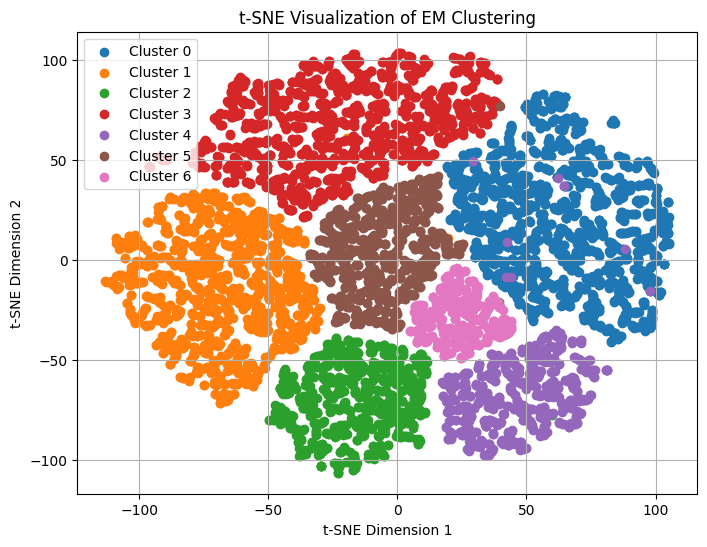

In [166]:
cluster_assignments = gm.predict(df_copy)

plt.figure(figsize=(8, 6))
for cluster in range(gm.n_components):
    plt.scatter(tsne_result[cluster_assignments == cluster, 0], tsne_result[cluster_assignments == cluster, 1], label=f'Cluster {cluster}')

plt.legend()
plt.title('t-SNE Visualization of EM Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


Exploring clusters

In [133]:
clusters=pd.concat([df_copy, pd.DataFrame({'cluster':cluster_labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.00,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,1.0
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.25,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.0
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.0
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.00,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,1.0
5,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.00,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,2.564949,1.0


In [134]:
from tabulate import tabulate

cluster_means = clusters.groupby('cluster').mean()

print(tabulate(cluster_means, headers='keys', tablefmt='pretty'))

+---------+-------------------+--------------------+--------------------+--------------------+------------------------+--------------------+---------------------+----------------------------+----------------------------------+------------------------+--------------------+--------------------+-------------------+-------------------+--------------------+---------------------+--------------------+
| cluster |      BALANCE      | BALANCE_FREQUENCY  |     PURCHASES      |  ONEOFF_PURCHASES  | INSTALLMENTS_PURCHASES |    CASH_ADVANCE    | PURCHASES_FREQUENCY | ONEOFF_PURCHASES_FREQUENCY | PURCHASES_INSTALLMENTS_FREQUENCY | CASH_ADVANCE_FREQUENCY |  CASH_ADVANCE_TRX  |   PURCHASES_TRX    |   CREDIT_LIMIT    |     PAYMENTS      |  MINIMUM_PAYMENTS  |  PRC_FULL_PAYMENT   |       TENURE       |
+---------+-------------------+--------------------+--------------------+--------------------+------------------------+--------------------+---------------------+----------------------------+-------------

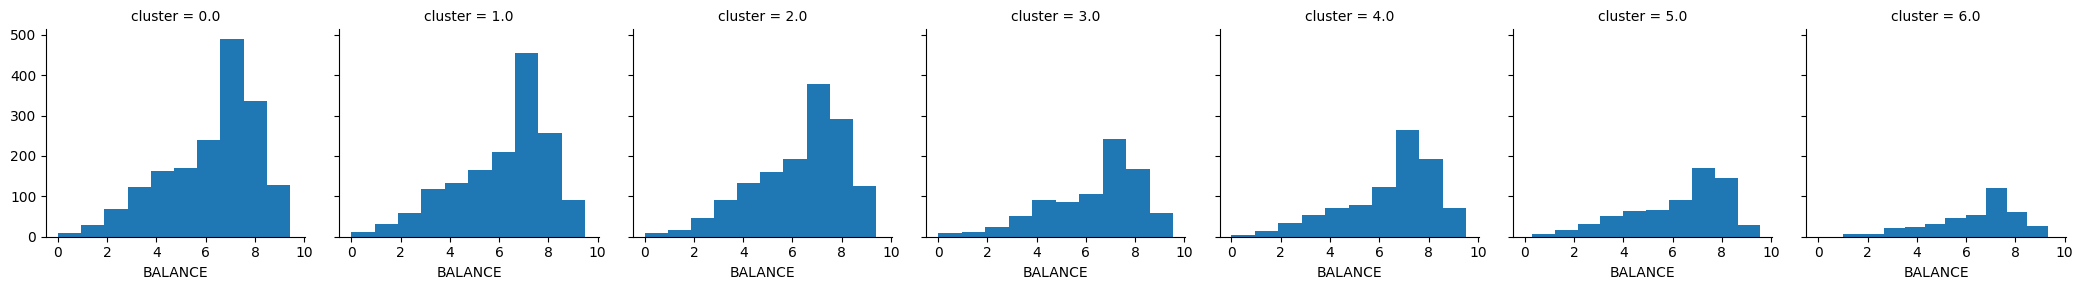

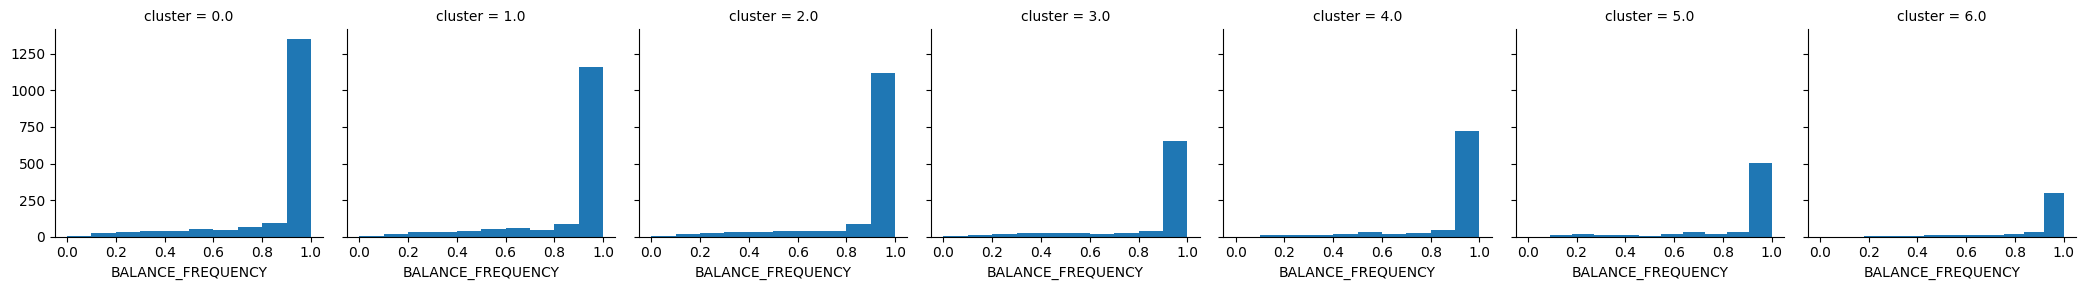

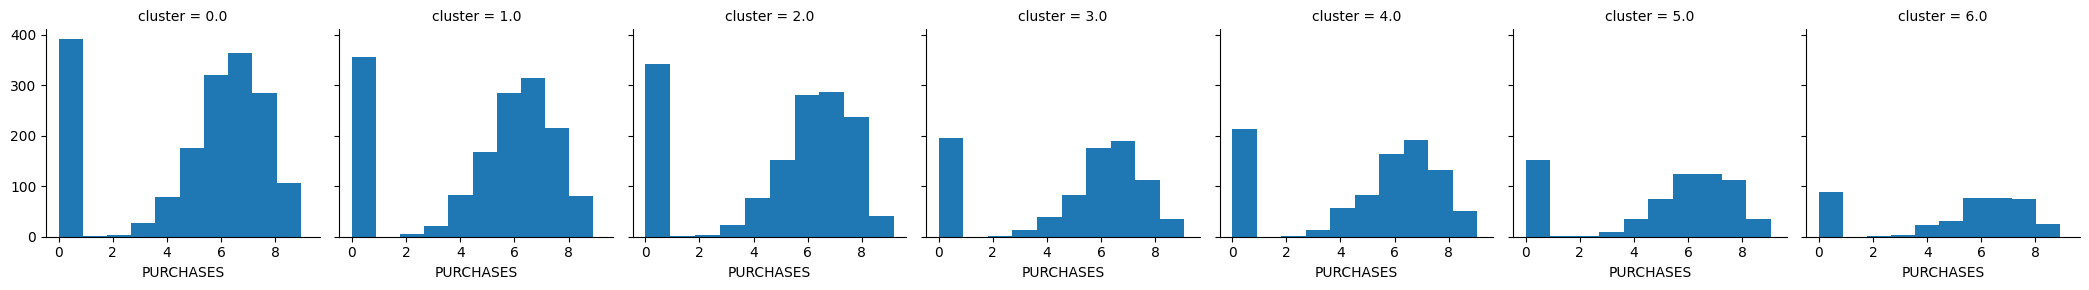

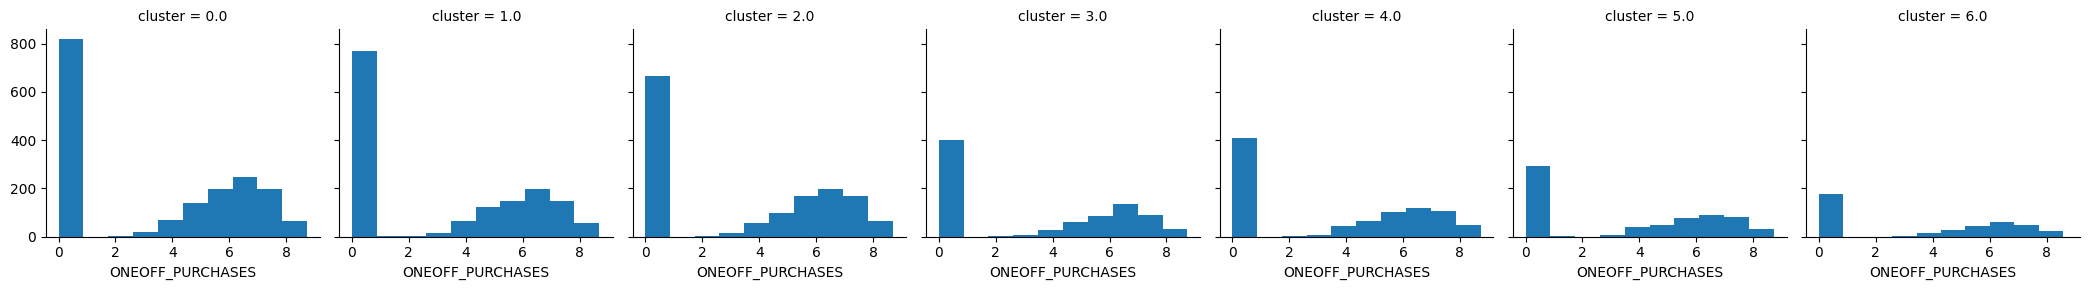

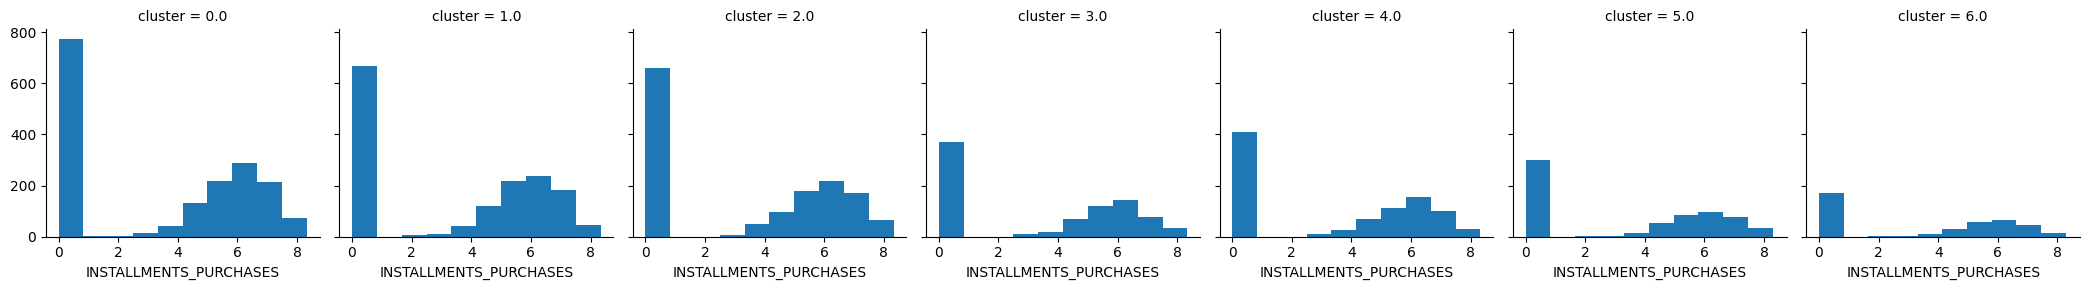

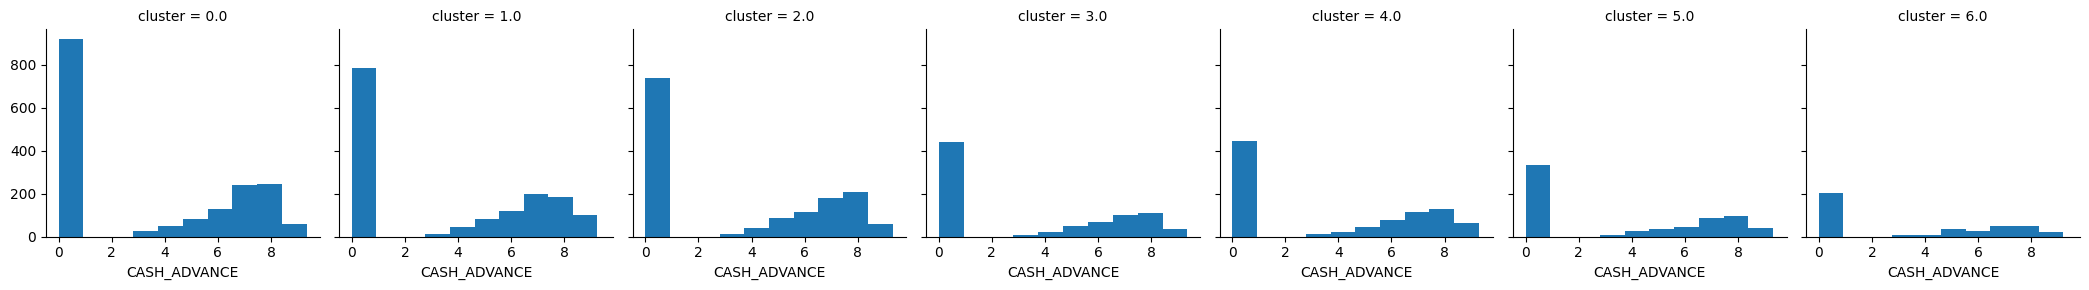

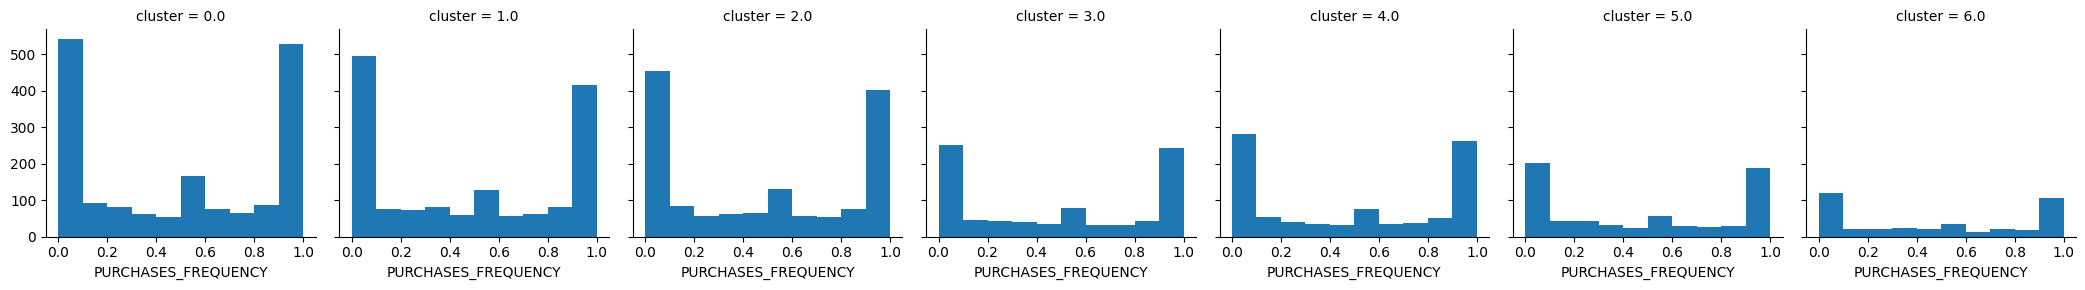

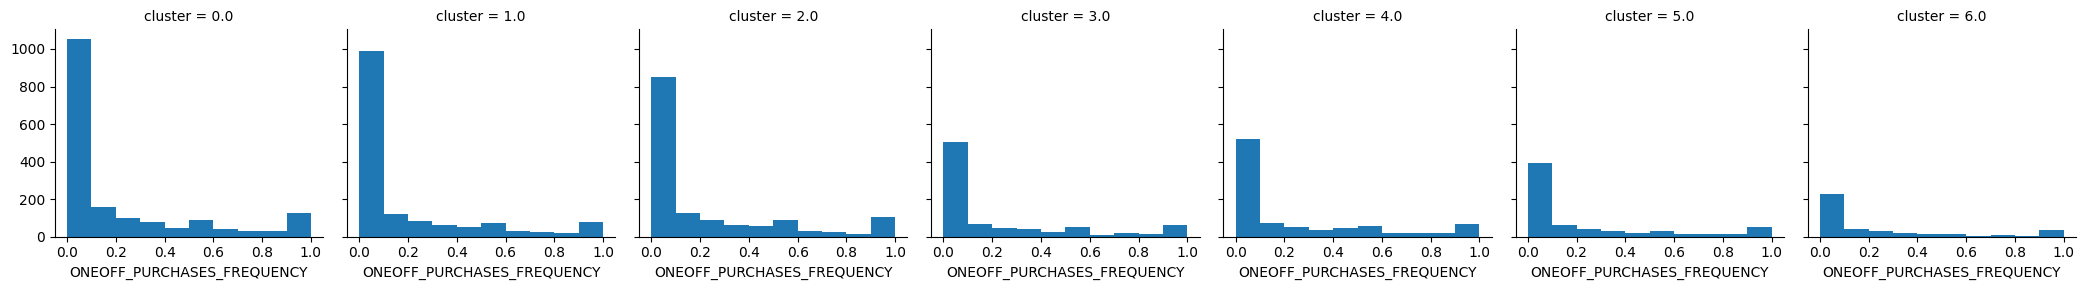

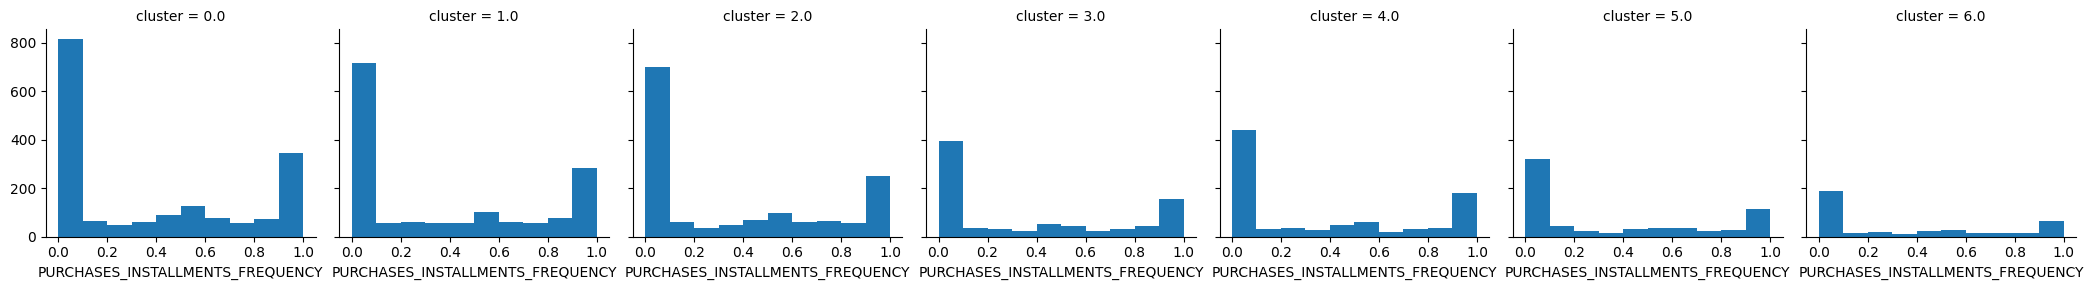

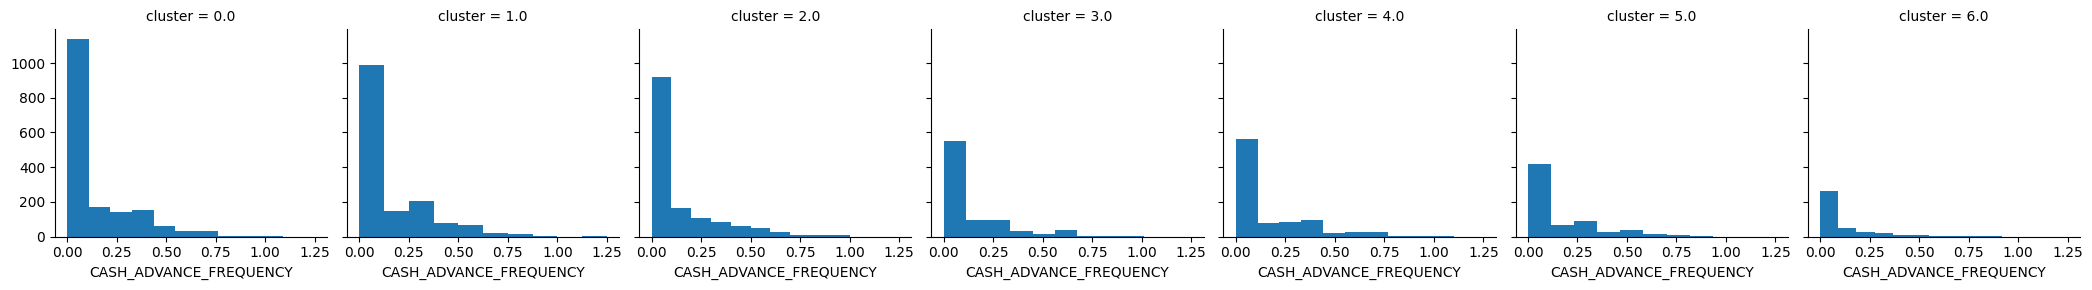

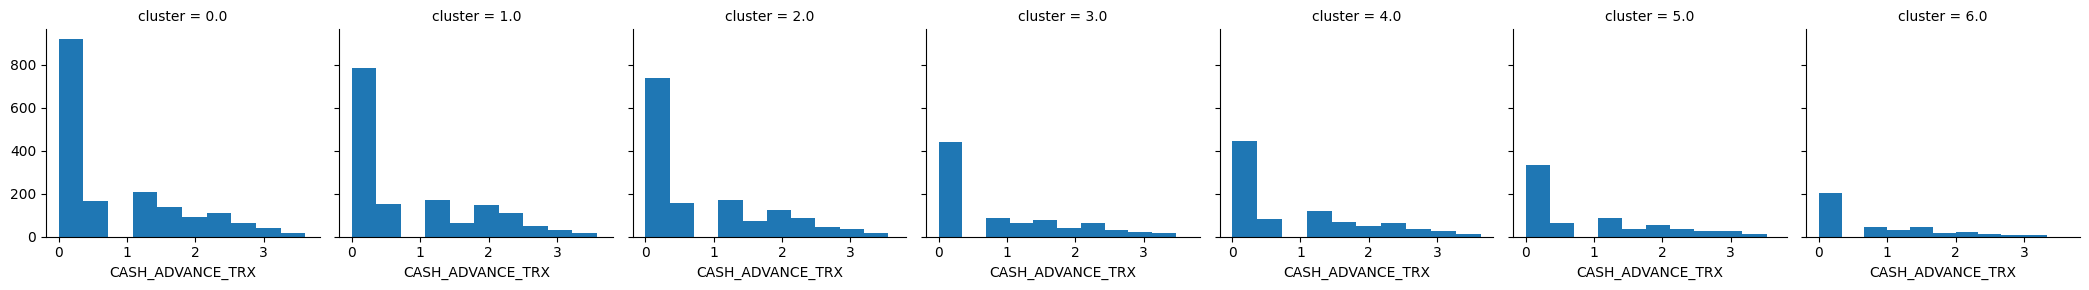

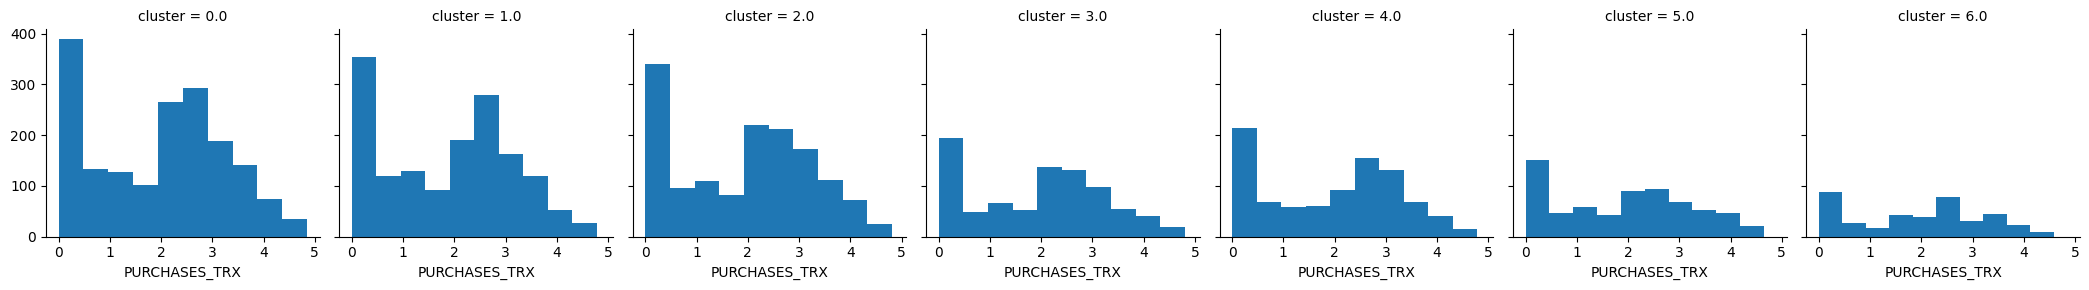

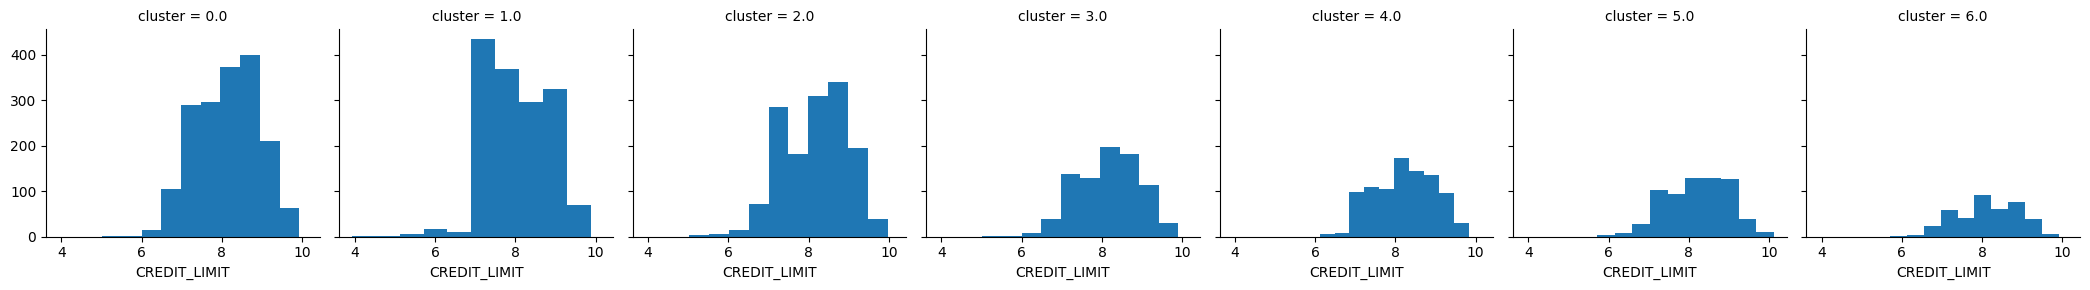

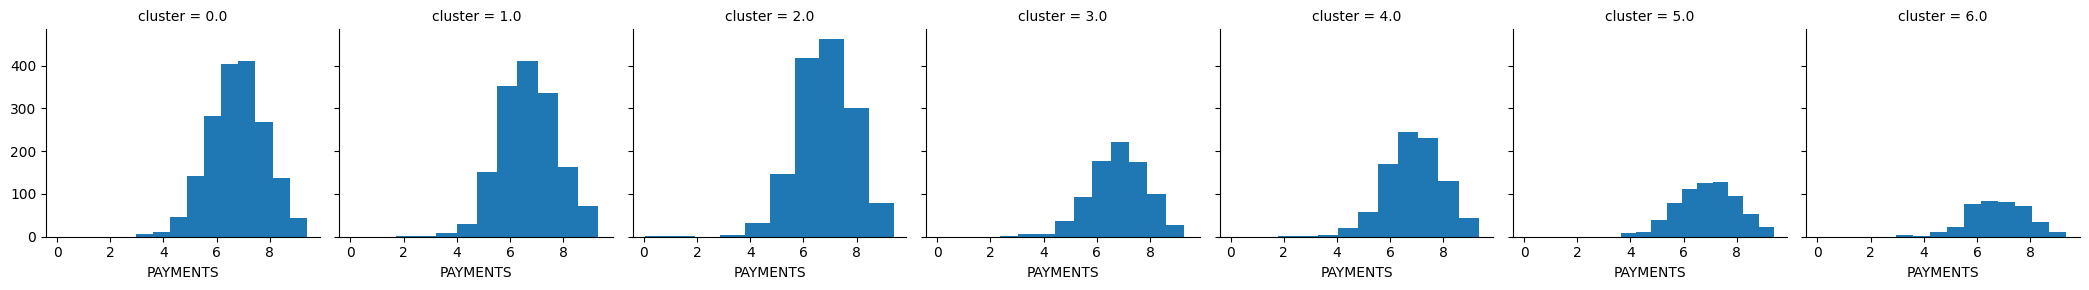

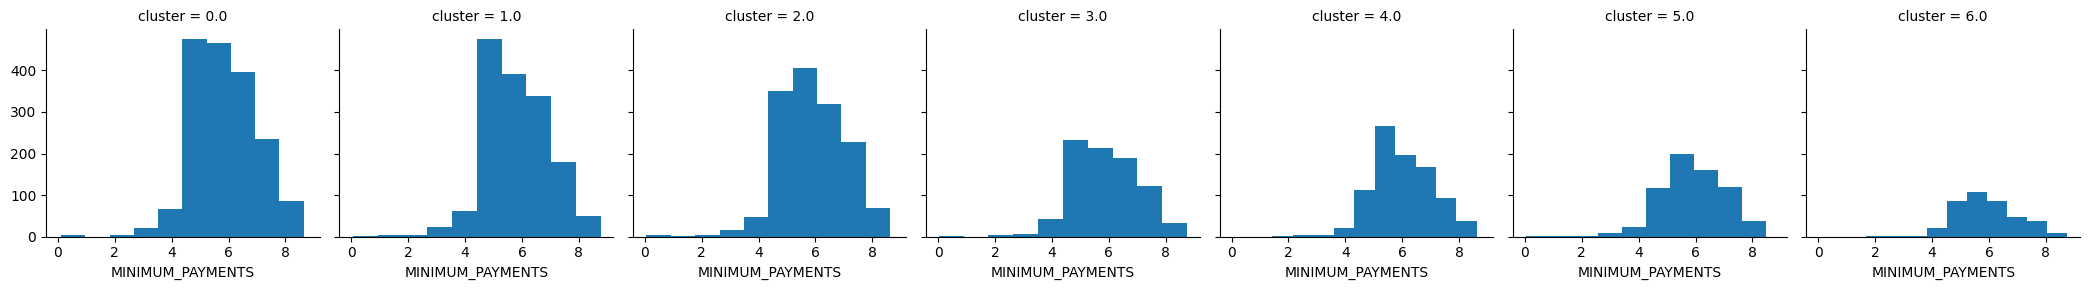

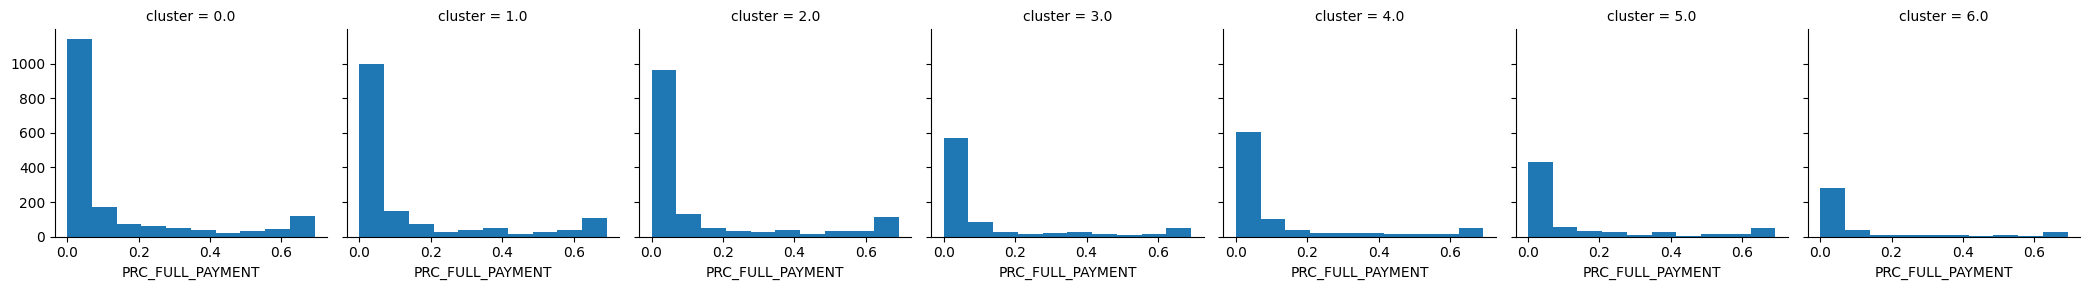

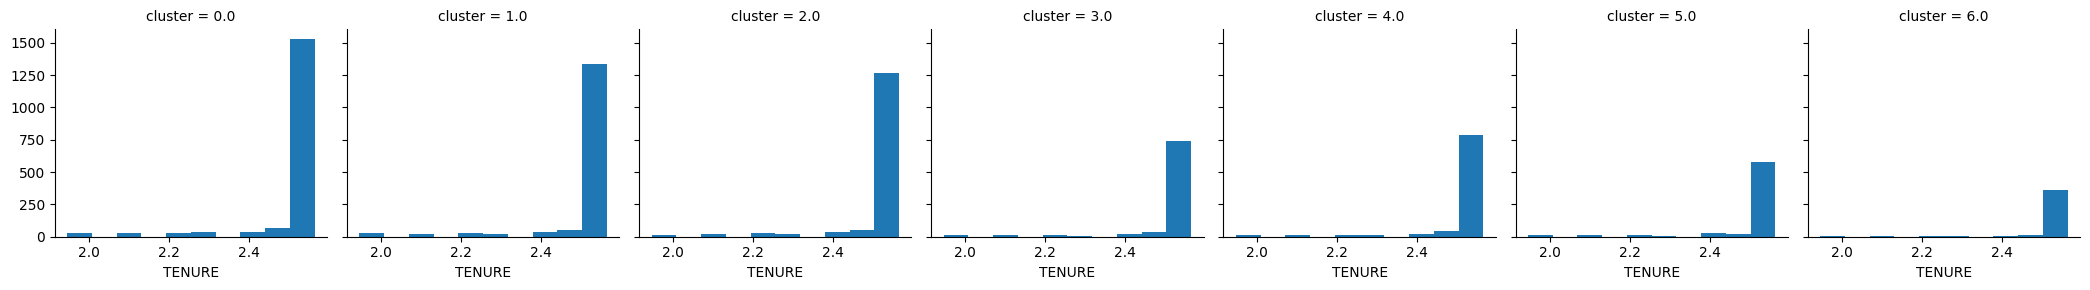

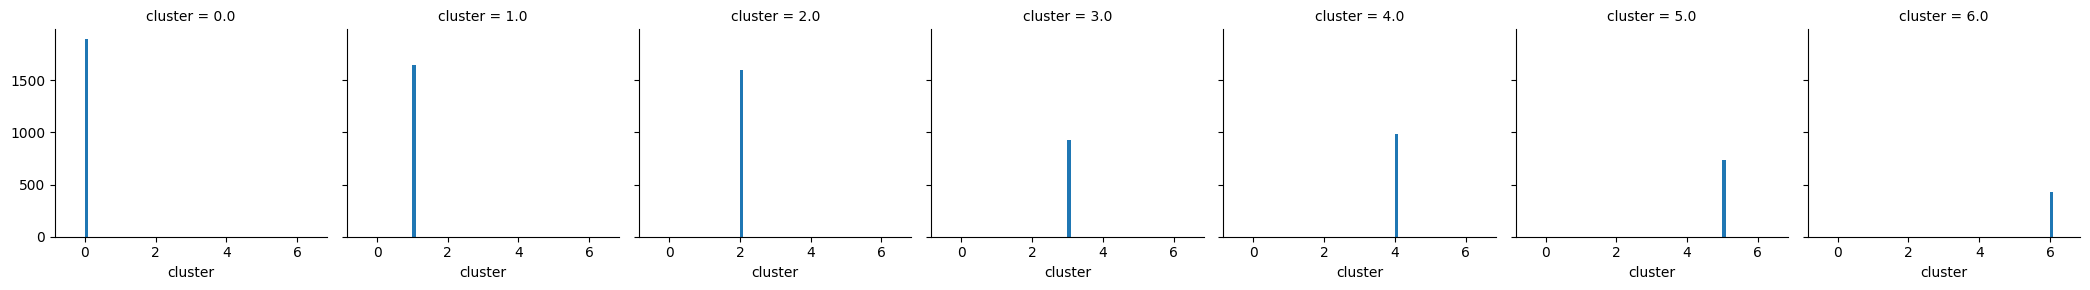

In [135]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

CLUSTER 0 shows a moderate balance, a relatively high balance frequency and purchases number, and the hightest number of purchase transactions made using the credit card.

CLUSTER 1 has the lowest balance and accordingly the lowest number and frequency of purchases, and credit limit and amount payments.

CLUSTER 2 shows a slighty higher balance than 0 & 1, and similarly higher balance frequency but less purchases than cluster 0 and higher limit and tenure than both.

CLUSTER 3 shows a high balance than the previous clusters but not higher purchases than cluster 0.

CLUSTER 4 shows the highest balance and a significantly higher balance frequency and the highest one-time payment number and tenure.

CLUSTER 5 has a relatively low balance and the lowest balance frequency, the highest credit limit and payment number.

CLUSTER 6 has a relatively high balance and the highest amount of purchases, oneoff and installment purchases. It has the lowest percentage of the full credit card balance paid off each mont and a relatively high tenure.